# K-Means

<br> 

Throughout this notebook, the K-Means model will be implemented on both the Zero and Nonzero Datasets.

## <u> Table of Contents </u>
* [Import the DataSet](#1)
* [Modelling Zero Data](#22.3)
    * [Elbow & Silhoutte: Zero](#23)
    * [Modelling Original](#23.1)
        * [Zero: K-Means](#M1)
        * [Zero Visualisation](#N00)
* [Modelling Nonzero Data](#MU)
    * [Elbow & Silhoutte: Nonzero](#NN)
        * [Nonzero: K-Means](#M6)
        * [Nonzero Visualisation](#N0)

<br>

## Import the DataSet  <a class="anchor" id="1"></a>

In [1]:
#!pip install plotly
#!pip install joypy
#!pip install pyvis
#!pip install prince
#!pip install pyclustering
#!pip install clusteval
#!pip install kmodes
#!pip install gower
#!pip install scikit-learn-extra
#!pip install minisom
#!pip install fuzzy-c-means

In [2]:
# Remove the warnings

import warnings; warnings.simplefilter('ignore')

# Basic Packages

import pandas as pd
import numpy as np
from numpy import asarray
from numpy import save

# Set a random state 

np.random.seed(9)

# Notebook Setup

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
pd.set_option('display.max_columns', None)

# Plotting Packages

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from matplotlib.widgets import SpanSelector
from bokeh.models import Div, RangeSlider, Spinner
from bokeh.plotting import figure, show
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from joypy import joyplot
from pyvis.network import Network
from IPython.display import Image
import plotly.offline as pyo
from yellowbrick.cluster import KElbowVisualizer

# Set notebook mode to work in offline

pyo.init_notebook_mode()

# Packages for Transformations

import scipy.special
import prince
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Packages for Clustering

from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from clusteval import clusteval
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering 
import gower
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from minisom import MiniSom
from sklearn.cluster import Birch
import scipy.cluster.hierarchy as shc
from fcmeans import FCM

# Packages to measure performance

from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from scipy.spatial import distance as ssd
from pyclustering.cluster.kmedoids import kmedoids

In [3]:
# Import the zero dataset 

final_zero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/final_zero.csv')
final_zero.drop(columns=['Unnamed: 0'], inplace=True)
tra_zero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/tra_zero.csv')
tra_zero.drop(columns=['Unnamed: 0'], inplace=True)
zero_df = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/zero_df.csv')
zero_df.drop(columns=['Unnamed: 0'], inplace=True)

# Import the nonzero dataset 

final_nonzero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/final_nonzero.csv')
final_nonzero.drop(columns=['Unnamed: 0'], inplace=True)
tra_nonzero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/tra_nonzero.csv')
tra_nonzero.drop(columns=['Unnamed: 0'], inplace=True)
nonzero_df = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/nonzero_df.csv')
nonzero_df.drop(columns=['Unnamed: 0'], inplace=True)

## Model Definition

In [4]:
# We define the models we are interested in set the parameters to evaluate the GOF

ce_kmeans = clusteval(cluster='kmeans', evaluate='silhouette', max_clust=50)

<br>

## Modelling Zero Data  <a class="anchor" id="22.3"></a>

<br>

## Elbow & Silhoutte: Zero  <a class="anchor" id="23"></a>

For the visualisations we use a package called clusteval which easily computes and depicts the measurements of goodness of fit (GOF) for the models.
<br>

**Zero Data-Set**

In [5]:
# we create an array based on the dataset

numpy_arr_1 = final_zero.to_numpy()


[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|███████████████████████████████████████████| 48/48 [00:54<00:00,  1.14s/it]


[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


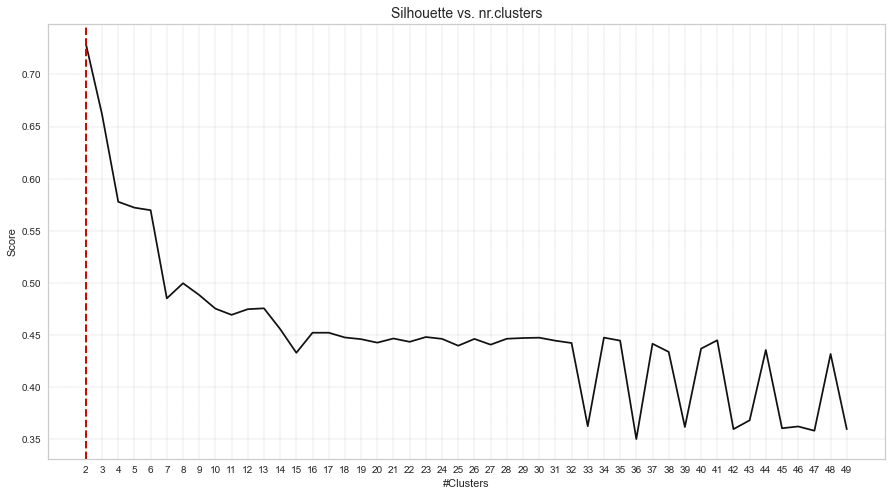

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [6]:
# Fit the array to find optimal number of clusters

ce_kmeans.fit(numpy_arr_1)

# Make plot of the silhouette

ce_kmeans.plot()

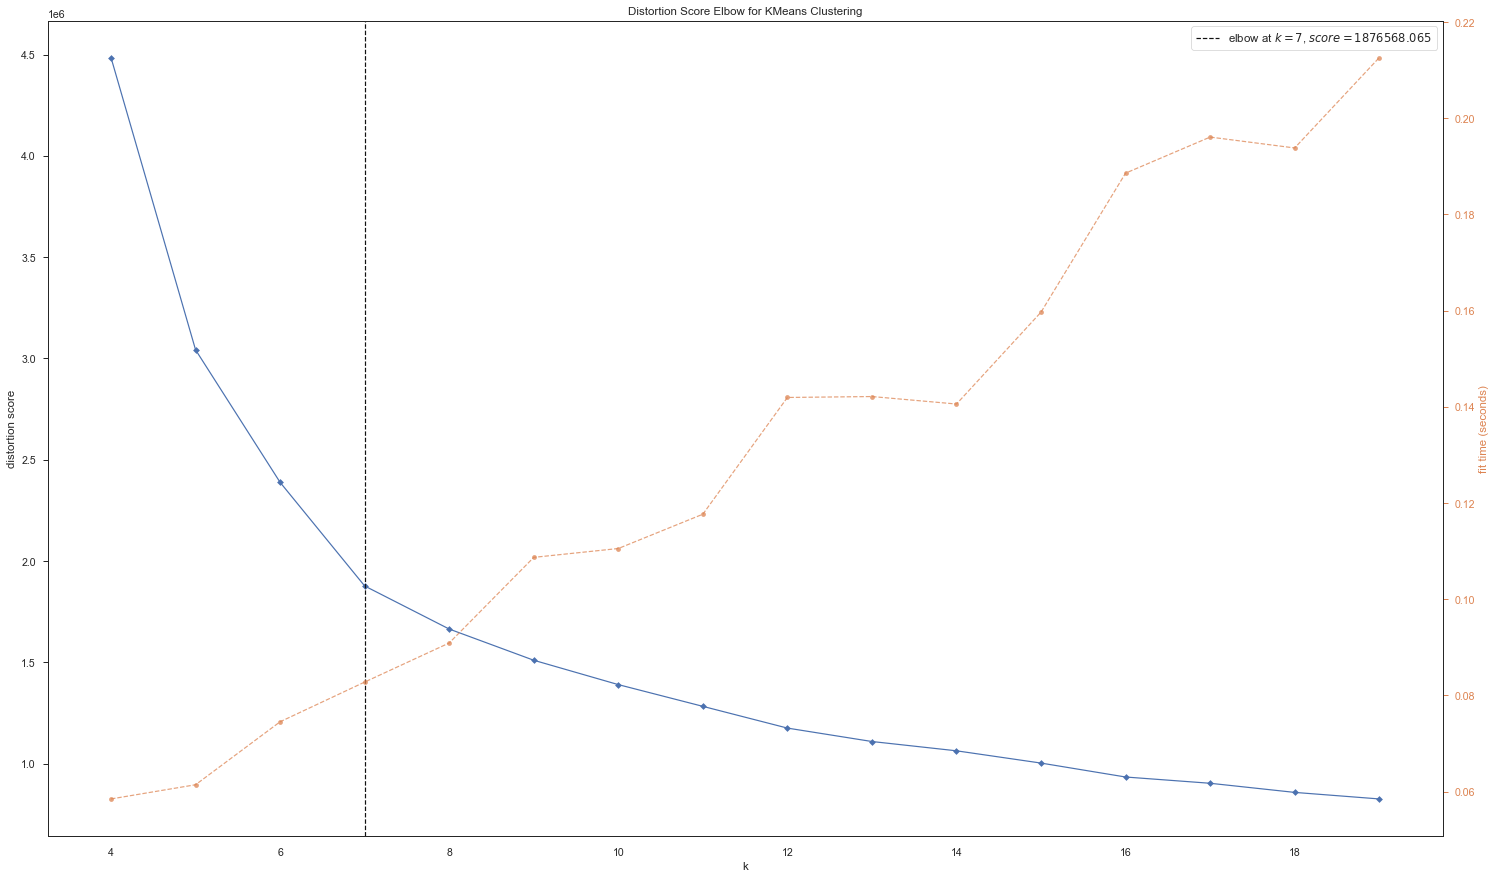

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
# set the basic format (i.e. the palette for the color and the backgrounds)
sns.set(rc={'axes.facecolor':'white'})
sns.set_context("paper", font_scale = 1.2)
sns.set_style("white")

# set the size of the plot
fig, ax = plt.subplots(figsize=(25,15))

# Elboe method utilising a different package
elb = KElbowVisualizer(KMeans(), k=(4,20), color=['#002034', "#82ceff"])
elb.fit(final_zero)        
elb.show()

## Modeling Original  <a class="anchor" id="23.1"></a>

Throughout this section we will try to implement a K-Means algorithm to see its performance on the original dataset.

###  Zero

In [8]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

#### K-Means <a class="anchor" id="M1"></a>

In [9]:
# we define the function for K-Means

k_model_zero = KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=1000, 
                 n_clusters=6, n_init=50, random_state=9, tol=0.0001, verbose=0)

k_model_zero_7 = KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=1000, 
                 n_clusters=7, n_init=50, random_state=9, tol=0.0001, verbose=0)

# Fit the function to the original zero dataset

k_model_zero.fit(final_zero)
k_model_zero.cluster_centers_

# Assign the labels to the respective rows and further view the cluster segmentation 

final_zero["Cluster_k"] = k_model_zero.labels_
tra_zero["Cluster_k"] = k_model_zero.labels_

zero_df["Cluster_k"] = k_model_zero.labels_
zero_df['Cluster_k'].value_counts()


# Fit the function to the original zero dataset

k_model_zero_7.fit(final_zero)

# Assign the labels to the respective rows and further view the cluster segmentation 

final_zero["Cluster_k7"] = k_model_zero_7.labels_
tra_zero["Cluster_k7"] = k_model_zero_7.labels_

zero_df["Cluster_k7"] = k_model_zero_7.labels_
zero_df['Cluster_k7'].value_counts()

5    1982
0    1107
3     620
4     507
2     466
6     328
1     176
Name: Cluster_k7, dtype: int64

In [10]:
print('The performance scores are the following: \n' )
print('Six Clusters')
print('Silhouette: ' + str(silhouette_score(final_zero, final_zero["Cluster_k"])))
print('Calinski Harabasz: ' + str(calinski_harabasz_score(final_zero, final_zero["Cluster_k"])))
print('Davies Bouldin: ' + str(davies_bouldin_score(final_zero, final_zero["Cluster_k"])))
print('\n')
print('Seven Clusters')
print('Silhouette: ' + str(silhouette_score(final_zero, final_zero["Cluster_k7"])))
print('Calinski Harabasz: ' + str(calinski_harabasz_score(final_zero, final_zero["Cluster_k7"])))
print('Davies Bouldin: ' + str(davies_bouldin_score(final_zero, final_zero["Cluster_k7"])))

The performance scores are the following: 

Six Clusters
Silhouette: 0.5689753997763245
Calinski Harabasz: 23251.018019459287
Davies Bouldin: 0.60325633278844


Seven Clusters
Silhouette: 0.489662521797062
Calinski Harabasz: 25078.29967623434
Davies Bouldin: 0.697278296697353


###  Zero Visualisation <a class="anchor" id="N00"></a>

In [11]:
tt = tra_zero.drop(columns=['Cluster_k'])

PCs_1d = pd.DataFrame(pca_1d.fit_transform(tt))

PCs_2d = pd.DataFrame(pca_2d.fit_transform(tt))

PCs_3d = pd.DataFrame(pca_3d.fit_transform(tt))


#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'

PCs_1d.columns = ["PC1_1d"]

PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]


tra_zero1=tra_zero.copy()

tra_zero1 = pd.concat([tra_zero1,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')


cluster0_k = tra_zero1[tra_zero1["Cluster_k"] == 0]
cluster1_k = tra_zero1[tra_zero1["Cluster_k"] == 1]
cluster2_k = tra_zero1[tra_zero1["Cluster_k"] == 2]
cluster3_k = tra_zero1[tra_zero1["Cluster_k"] == 3]
cluster4_k = tra_zero1[tra_zero1["Cluster_k"] == 4]
cluster5_k = tra_zero1[tra_zero1["Cluster_k"] == 5]

In [12]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter(
                    x = cluster0_k["PC1_2d"],
                    y = cluster0_k["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter(
                    x = cluster1_k["PC1_2d"],
                    y = cluster1_k["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter(
                    x = cluster2_k["PC1_2d"],
                    y = cluster2_k["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter(
                    x = cluster3_k["PC1_2d"],
                    y = cluster3_k["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter(
                    x = cluster4_k["PC1_2d"],
                    y = cluster4_k["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter(
                    x = cluster5_k["PC1_2d"],
                    y = cluster5_k["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)

data = [trace0, trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)

In [13]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter3d(
                    x = cluster0_k["PC1_3d"],
                    y = cluster0_k["PC2_3d"],
                    z = cluster0_k["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter3d(
                    x = cluster1_k["PC1_3d"],
                    y = cluster1_k["PC2_3d"],
                    z = cluster1_k["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter3d(
                    x = cluster2_k["PC1_3d"],
                    y = cluster2_k["PC2_3d"],
                    z = cluster2_k["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter3d(
                    x = cluster3_k["PC1_3d"],
                    y = cluster3_k["PC2_3d"],
                    z = cluster3_k["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter3d(
                    x = cluster4_k["PC1_3d"],
                    y = cluster4_k["PC2_3d"],
                    z = cluster4_k["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter3d(
                    x = cluster5_k["PC1_3d"],
                    y = cluster5_k["PC2_3d"],
                    z = cluster5_k["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)


data = [trace0, trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)

##  Modelling Nonzero Data<a class="anchor" id="MU"></a>

###  Elbow and Silhouette: Non-Zero <a class="anchor" id="NN"></a>

In [14]:
# we create an array based on the dataset

numpy_arr_2 = final_nonzero.to_numpy()


[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|███████████████████████████████████████████| 48/48 [03:09<00:00,  3.95s/it]


[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


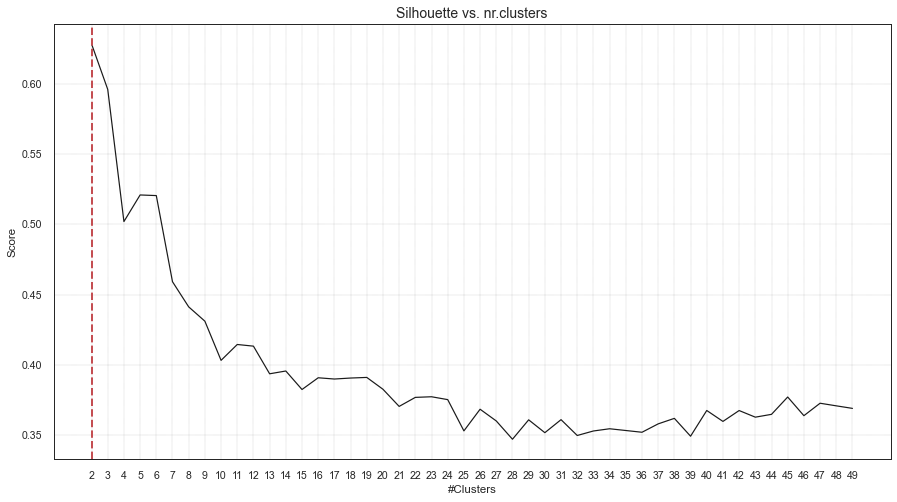

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [15]:
# Fit the array to find optimal number of clusters

ce_kmeans.fit(numpy_arr_2)

# Make plot of the silhouette

ce_kmeans.plot()

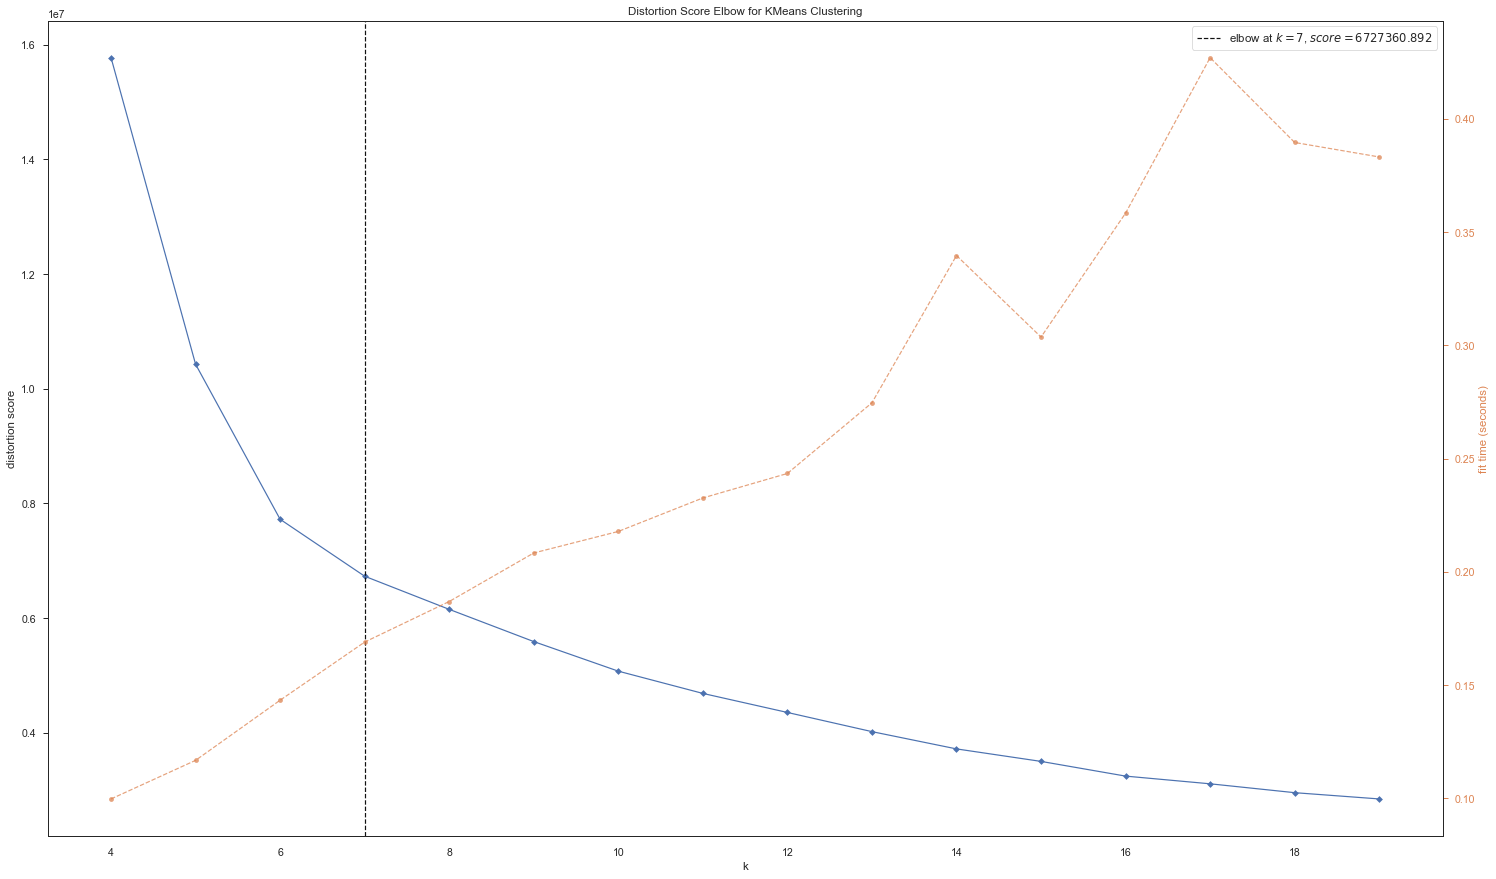

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# set the basic format (i.e. the palette for the color and the backgrounds)
sns.set(rc={'axes.facecolor':'white'})
sns.set_context("paper", font_scale = 1.2)
sns.set_style("white")

# set the size of the plot
fig, ax = plt.subplots(figsize=(25,15))

# Elboe method utilising a different package
elb = KElbowVisualizer(KMeans(), k=(4,20), color=['#002034', "#82ceff"])
elb.fit(final_nonzero)        
elb.show()

#### K-Means <a class="anchor" id="M6"></a>

In [17]:
# we set the function for K-Means

k_model_nonzero = KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=1000, 
                 n_clusters=6, n_init=50, random_state=9, tol=0.0001, verbose=0)

k_model_nonzero7 = KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=1000, 
                 n_clusters=7, n_init=50, random_state=9, tol=0.0001, verbose=0)

# Fit the function to the original nonzero dataset

k_model_nonzero.fit(final_nonzero)
k_model_nonzero.cluster_centers_

# Assign the labels to the respective rows and further view the cluster segmentation 

final_nonzero["Cluster_k"] = k_model_nonzero.labels_
tra_nonzero["Cluster_k"] = k_model_nonzero.labels_

nonzero_df["Cluster_k"] = k_model_nonzero.labels_
nonzero_df['Cluster_k'].value_counts()


# Fit the function to the original nonzero dataset

k_model_nonzero7.fit(final_nonzero)

# Assign the labels to the respective rows and further view the cluster segmentation 

final_nonzero["Cluster_k7"] = k_model_nonzero7.labels_
tra_nonzero["Cluster_k7"] = k_model_nonzero7.labels_

nonzero_df["Cluster_k7"] = k_model_nonzero7.labels_
nonzero_df['Cluster_k7'].value_counts()

0    2878
6    2633
2    2236
4    2089
3    2037
5    1163
1     771
Name: Cluster_k7, dtype: int64

In [18]:
print('The performance scores are the following: \n' )
print('Six Clusters')
print('Silhouette: ' + str(silhouette_score(final_nonzero, final_nonzero["Cluster_k"])))
print('Calinski Harabasz: ' + str(calinski_harabasz_score(final_nonzero, final_nonzero["Cluster_k"])))
print('Davies Bouldin: ' + str(davies_bouldin_score(final_nonzero, final_nonzero["Cluster_k"])))
print('\n')
print('Seven Clusters')
print('Silhouette: ' + str(silhouette_score(final_nonzero, final_nonzero["Cluster_k7"])))
print('Calinski Harabasz: ' + str(calinski_harabasz_score(final_nonzero, final_nonzero["Cluster_k7"])))
print('Davies Bouldin: ' + str(davies_bouldin_score(final_nonzero, final_nonzero["Cluster_k7"])))

The performance scores are the following: 

Six Clusters
Silhouette: 0.5218857252340414
Calinski Harabasz: 63894.16564005964
Davies Bouldin: 0.6205469393580987


Seven Clusters
Silhouette: 0.46151970599062586
Calinski Harabasz: 61540.41855077067
Davies Bouldin: 0.7519746402730726


###   Non-Zero Visualisation <a class="anchor" id="N0"></a>

In [19]:
nn = tra_nonzero.drop(columns=['Cluster_k'])

PCs_1d_n = pd.DataFrame(pca_1d.fit_transform(nn))

PCs_2d_n = pd.DataFrame(pca_2d.fit_transform(nn))

PCs_3d_n = pd.DataFrame(pca_3d.fit_transform(nn))


#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'

PCs_1d_n.columns = ["PC1_1d"]

PCs_2d_n.columns = ["PC1_2d", "PC2_2d"]

PCs_3d_n.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]


tra_nonzero1=tra_nonzero.copy()

tra_nonzero1 = pd.concat([tra_nonzero1,PCs_1d_n,PCs_2d_n,PCs_3d_n], axis=1, join='inner')


cluster0_nk = tra_nonzero1[tra_nonzero1["Cluster_k"] == 0]
cluster1_nk = tra_nonzero1[tra_nonzero1["Cluster_k"] == 1]
cluster2_nk = tra_nonzero1[tra_nonzero1["Cluster_k"] == 2]
cluster3_nk = tra_nonzero1[tra_nonzero1["Cluster_k"] == 3]
cluster4_nk = tra_nonzero1[tra_nonzero1["Cluster_k"] == 4]
cluster5_nk = tra_nonzero1[tra_nonzero1["Cluster_k"] == 5]

In [20]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter(
                    x = cluster0_nk["PC1_2d"],
                    y = cluster0_nk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter(
                    x = cluster1_nk["PC1_2d"],
                    y = cluster1_nk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter(
                    x = cluster2_nk["PC1_2d"],
                    y = cluster2_nk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter(
                    x = cluster3_nk["PC1_2d"],
                    y = cluster3_nk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter(
                    x = cluster4_nk["PC1_2d"],
                    y = cluster4_nk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter(
                    x = cluster5_nk["PC1_2d"],
                    y = cluster5_nk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)


data = [trace0, trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)

In [21]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter3d(
                    x = cluster0_nk["PC1_3d"],
                    y = cluster0_nk["PC2_3d"],
                    z = cluster0_nk["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter3d(
                    x = cluster1_nk["PC1_3d"],
                    y = cluster1_nk["PC2_3d"],
                    z = cluster1_nk["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter3d(
                    x = cluster2_nk["PC1_3d"],
                    y = cluster2_nk["PC2_3d"],
                    z = cluster2_nk["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter3d(
                    x = cluster3_nk["PC1_3d"],
                    y = cluster3_nk["PC2_3d"],
                    z = cluster3_nk["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter3d(
                    x = cluster4_nk["PC1_3d"],
                    y = cluster4_nk["PC2_3d"],
                    z = cluster4_nk["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter3d(
                    x = cluster5_nk["PC1_3d"],
                    y = cluster5_nk["PC2_3d"],
                    z = cluster5_nk["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)


data = [trace0, trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)